#Загрузка данных и EDA


In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162711 sha256=4ff4f62817d811d822e3ffefcca3d48810831f749c8ff18d6721ee2bf778b52e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [ ]:
import numpy as np
import pandas as pd
from surprise import KNNWithMeans, KNNBasic, SVD, SVDpp
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [ ]:

users = pd.read_csv('Users.csv')
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
users['Age'].isnull().sum()

110762

<Axes: >

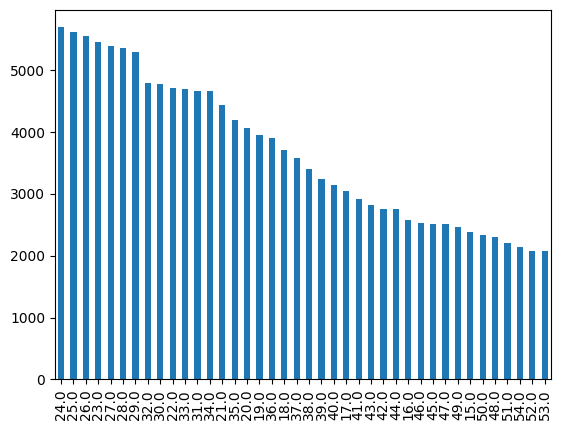

In [ ]:
users.Age.value_counts().head(40).plot(kind = 'bar')

In [ ]:
users.Age.median()

32.0

In [ ]:
users['Location'] = users['Location'].str.split(',').str[-1].str.strip()



<Axes: >

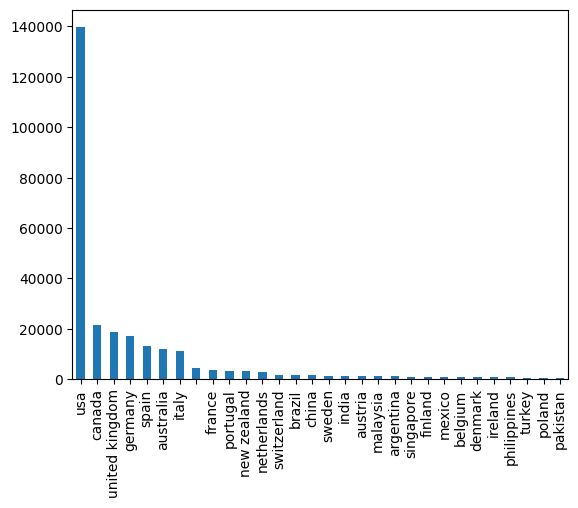

In [ ]:
users['Location'].value_counts().head(30).plot(kind='bar')

In [ ]:
books = pd.read_csv('Books.csv', on_bad_lines='skip')

books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
books = books.dropna()

<Axes: >

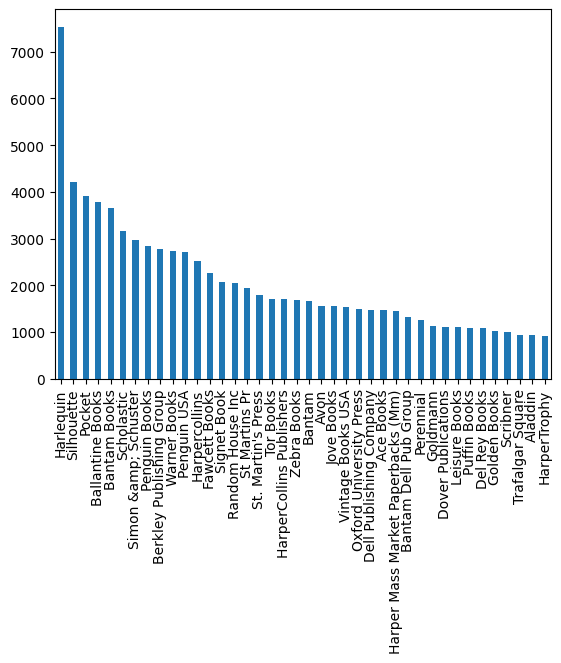

In [ ]:
books.Publisher.value_counts().head(40).plot(kind = 'bar')

<Axes: >

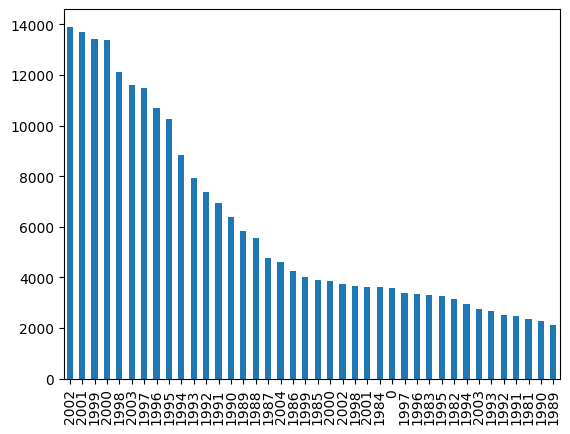

In [ ]:
books['Year-Of-Publication'].value_counts().head(40).plot(kind = 'bar')

In [ ]:
rating = pd.read_csv('Ratings.csv', on_bad_lines = 'skip')
rating

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
rating['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [ ]:
rating =rating.loc[rating['Book-Rating'] != 0]

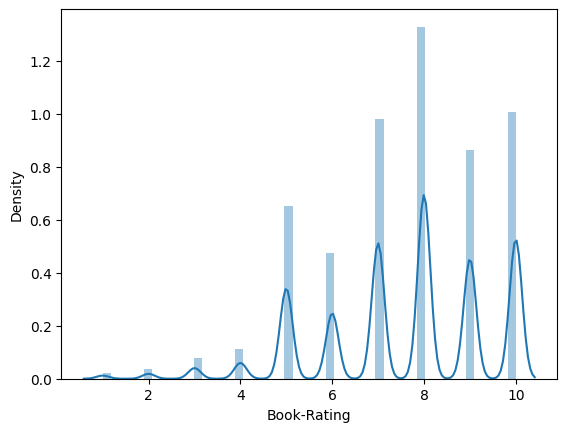

In [ ]:
import seaborn as sns
sns_plot = sns.distplot(rating['Book-Rating'])
fig = sns_plot.get_figure

#User-based Коллаборативная рекомендательная система

In [ ]:
rat_book = rating.merge(books, on = 'ISBN' )
rat_book =rat_book.merge (users, on = 'User-ID')

In [ ]:
min_rat_thresh = 50
ratings_by_user = rat_book.groupby('User-ID')['Book-Rating'].count()
main_user_ids =ratings_by_user[ratings_by_user > min_rat_thresh].index

In [ ]:
user_ratings = rat_book[rat_book['User-ID'].isin(main_user_ids)]

In [ ]:
min_rat_count_thres=20
rat_counts= user_ratings.groupby('Book-Title').count()['Book-Rating']
popular_books = rat_counts[rat_counts >= min_rat_count_thres].index

In [ ]:
ratings_fin =  user_ratings[user_ratings['Book-Title'].isin(popular_books)]
ratings_fin

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
4,11676,038550120X,10,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,"n/a, n/a, n/a",NaN
7,11676,0684867621,3,The Girl Who Loved Tom Gordon : A Novel,Stephen King,1999,Scribner,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,http://images.amazon.com/images/P/0684867621.0...,"n/a, n/a, n/a",NaN
13,11676,0440498058,8,A Wrinkle In Time,MADELEINE L'ENGLE,1998,Yearling,http://images.amazon.com/images/P/0440498058.0...,http://images.amazon.com/images/P/0440498058.0...,http://images.amazon.com/images/P/0440498058.0...,"n/a, n/a, n/a",NaN
25,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,"n/a, n/a, n/a",NaN
26,11676,0385504209,9,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"n/a, n/a, n/a",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
298975,50823,0671702505,9,The Gift,Julie Garwood,1991,Pocket,http://images.amazon.com/images/P/0671702505.0...,http://images.amazon.com/images/P/0671702505.0...,http://images.amazon.com/images/P/0671702505.0...,"sacramento, california, usa",NaN
300855,183958,0767900383,9,Under the Tuscan Sun,Frances Mayes,1997,Broadway,http://images.amazon.com/images/P/0767900383.0...,http://images.amazon.com/images/P/0767900383.0...,http://images.amazon.com/images/P/0767900383.0...,"pambula, new south wales, australia",57.0
300864,183958,0930044177,8,Outlander,Jane Rule,1981,Naiad Press,http://images.amazon.com/images/P/0930044177.0...,http://images.amazon.com/images/P/0930044177.0...,http://images.amazon.com/images/P/0930044177.0...,"pambula, new south wales, australia",57.0
303079,3757,0807281859,9,"The Subtle Knife (His Dark Materials, Book 2)",Philip Pullman,2000,Listening Library,http://images.amazon.com/images/P/0807281859.0...,http://images.amazon.com/images/P/0807281859.0...,http://images.amazon.com/images/P/0807281859.0...,"madrid, madrid, spain",NaN


In [ ]:
dataset = pd.DataFrame({
    'uid': ratings_fin['User-ID'],
    'iid': ratings_fin['Book-Title'],
    'rating': ratings_fin['Book-Rating']
})

In [ ]:
reader = Reader(rating_scale=(0.2, 10))
data = Dataset.load_from_df(dataset, reader)
trainset, testset = train_test_split(data, test_size=0.15, random_state=42)

In [ ]:
algo1 = KNNWithMeans (k=50, sim_options= {'user_based': 'False'}) #не хватает ОЗУ
algo1.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
from surprise import accuracy
test_pred1 = algo1.test(testset)
accuracy.rmse(test_pred1, verbose=True)

RMSE: 1.5356


1.535637039417357

In [ ]:
algo2 = SVD(n_factors = 20, n_epochs = 20, lr_all = 0.01, reg_all = 0.1)
algo2.fit(trainset)

In [ ]:
test_pred2 = algo2.test(testset)
accuracy.rmse(test_pred2, verbose = True)

RMSE: 1.4472


1.4472101595603293

In [ ]:
def generate_recommendation(uid, model, dataset, thresh= 7, amount = 5):
    all_titles = dataset['iid']
    users_seen_titles = dataset[dataset['uid'] == uid]['iid']
    titles = np.array(list(set(all_titles) - set(users_seen_titles)))

    np.random.shuffle(titles)

    rec_list = []
    for title in titles:
        review_prediction = model.predict(uid=uid, iid=title)
        rating = review_prediction.est

        if rating >= thresh:
            rec_list.append((title, round(rating, 2)))

            if len(rec_list) >= amount:
                return rec_list

In [ ]:
generate_recommendation(7, algo2, dataset)

[('Me Talk Pretty One Day', 8.06),
 ('The Gunslinger (The Dark Tower, Book 1)', 8.42),
 ('A Case of Need', 7.37),
 ('It', 8.01),
 ('Midnight in the Garden of Good and Evil: A Savannah Story', 8.03)]

#Гибридная рекомендательная система на основе двух алгоритмов


In [ ]:
def new_books(dataset, user_id):
  books_read = dataset[dataset['uid']==user_id]['iid'].tolist()
  books_all = dataset['iid'].tolist()
  books_unread = list(set(books_all) - set(books_read))
  return books_unread

In [ ]:
def recomend_KNN(user_id):
  recommend_knn= pd.DataFrame()
  for i in new_books(dataset, user_id):
    book_rating = algo1.predict(uid=user_id, iid = i).est
    row = {'title':i, 'ratings_KNN': book_rating}
    recommend_knn = pd.concat([recommend_knn, pd.DataFrame([row])])
  return recommend_knn.sort_values('ratings_KNN', ascending=False)

In [ ]:
def recomend_SVD(user_id):
  recommend_svd = pd.DataFrame()
  for i in new_books(dataset, user_id):
    book_rating = algo2.predict(uid=user_id, iid = i).est
    row = {'title':i, 'ratings_SVD': book_rating}
    recommend_svd = pd.concat([recommend_svd, pd.DataFrame([row])])
  return recommend_svd.sort_values('ratings_SVD', ascending=False)

In [ ]:
def gibrid_recomendation(user_id, n):
  rec_1 = recomend_KNN(user_id)
  rec_2 = recomend_SVD(user_id)
  all_ratings = rec_2.merge(rec_1, on = 'title')
  all_ratings['mean_ratings'] = (all_ratings['ratings_SVD']+all_ratings['ratings_KNN'])/2
  all_ratings = all_ratings.sort_values('mean_ratings', ascending=False)
  return all_ratings['title'].tolist()[:n]


In [ ]:
gibrid_recomendation (7, n= 5)

['Where the Red Fern Grows',
 'The Amber Spyglass (His Dark Materials, Book 3)',
 '84 Charing Cross Road',
 'The Return of the King (The Lord of the Rings, Part 3)',
 "Ender's Game (Ender Wiggins Saga (Paperback))"]

#Коллаборативная рекомендательная система Item Based




In [ ]:
pv=df.pivot_table(index='Book-Title',columns='User-ID'
                          ,values='rating')

In [ ]:
pv.fillna(0,inplace=True)
pv

User-ID,243,254,507,638,643,741,882,929,1211,1424,...,277928,277965,278026,278137,278144,278188,278418,278582,278633,278843
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
101 Dalmatians,0.0,0.000000,2.638889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,2.638889,0.0,0.0,0.0
"14,000 Things to Be Happy About",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.54386,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,3.006116,0.0,0.0,0.0
"\O\"" Is for Outlaw""",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
"\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim_score = cosine_similarity(pv)

#Функция для генерации рекомендаций на основе косинусного сходства

In [ ]:
def recommend(book_name):
    index = np.where(pv.index==book_name)[0][0]
    similar_books = sorted(list(enumerate(sim_score[index])),key=lambda x:x[1], reverse=True)[1:6]

    data = []

    for i in similar_books:
        item = []
        temp_df = books[books['Book-Title'] == pv.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))

        data.append(item)
    return data

In [ ]:
recommend('1984')

[['Animal Farm', 'George Orwell'],
 ['Brave New World', 'Aldous Huxley'],
 ['Lord of the Flies', 'William Gerald Golding'],
 ['The Catcher in the Rye', 'J.D. Salinger'],
 ["The Restaurant at the End of the Universe (Hitchhiker's Trilogy (Paperback))",
  'Douglas Adams']]

In [ ]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

[['Harry Potter and the Goblet of Fire (Book 4)', 'J. K. Rowling'],
 ['Harry Potter and the Chamber of Secrets (Book 2)', 'J. K. Rowling'],
 ['Harry Potter and the Order of the Phoenix (Book 5)', 'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)", 'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling']]

In [ ]:
recommend('The Little Prince')

[['The Trial', 'Franz Kafka'],
 ['West With the Night', 'Beryl Markham'],
 ['The Unbearable Lightness of Being : A Novel (Perennial Classics)',
  'Milan Kundera'],
 ['Smoke and Mirrors: Short Fictions and Illusions', 'Neil Gaiman'],
 ['Perfume: The Story of a Murderer (Vintage International)',
  'Patrick Suskind']]